# Faceting

* Breaking down a complex distribution into simpler parts
* Especially useful if we have a categorical variable with a lot of levels
* Each subplot should have the same axis level

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6,4.5) # To set teh plot figure size
%config InlineBackend.figure_format = 'retina'

fuel_econ = pd.read_csv("fuel-econ.csv")
print(fuel_econ.shape)
fuel_econ.head(4)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5


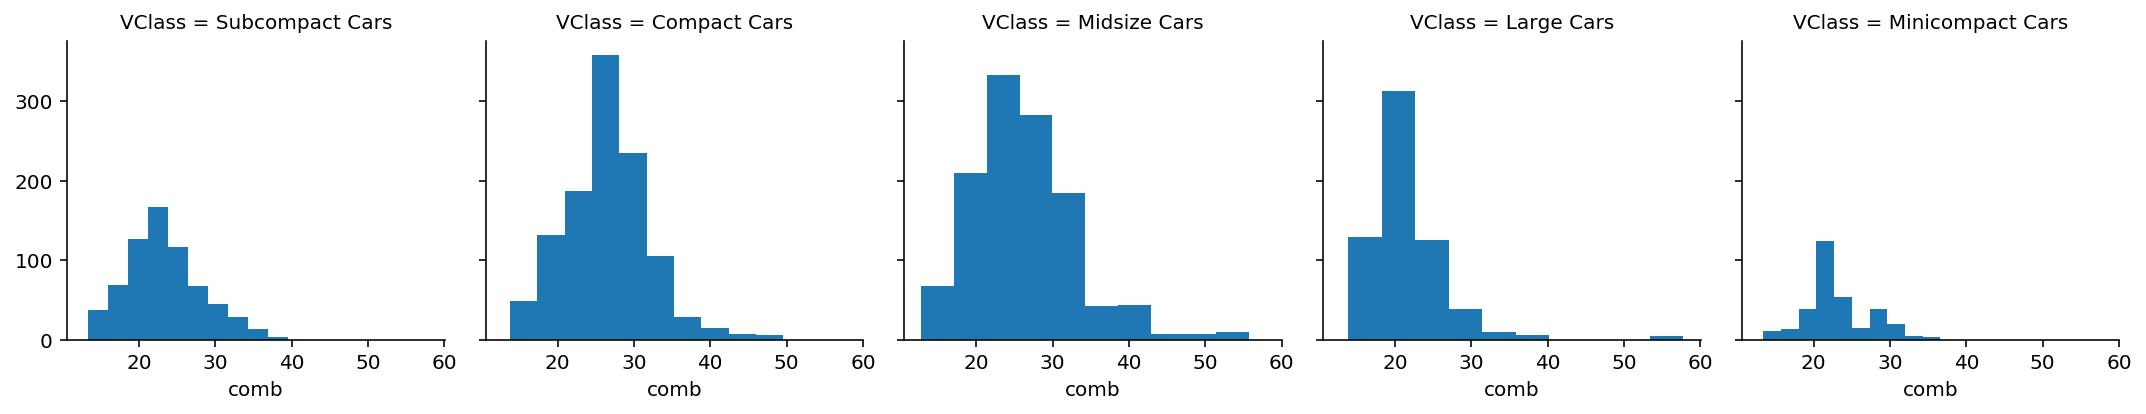

In [10]:
# One facet will be created for each categorical value of 'VClass'
g = sb.FacetGrid(data=fuel_econ, col='VClass');

# Specify what function to plot in each facet
g.map(plt.hist, 'comb');   # donot put x='comb'

### Enhancements:

* map() to define the function to be plotted in the facets
* `col_wrap` can be used to limit number of plots in a row
* set equal bin size for ease of comparison
* `sharey =False` in FacetGrid to set independent y-axis. But this can give dangerous implications of comparing data on defferent scales 

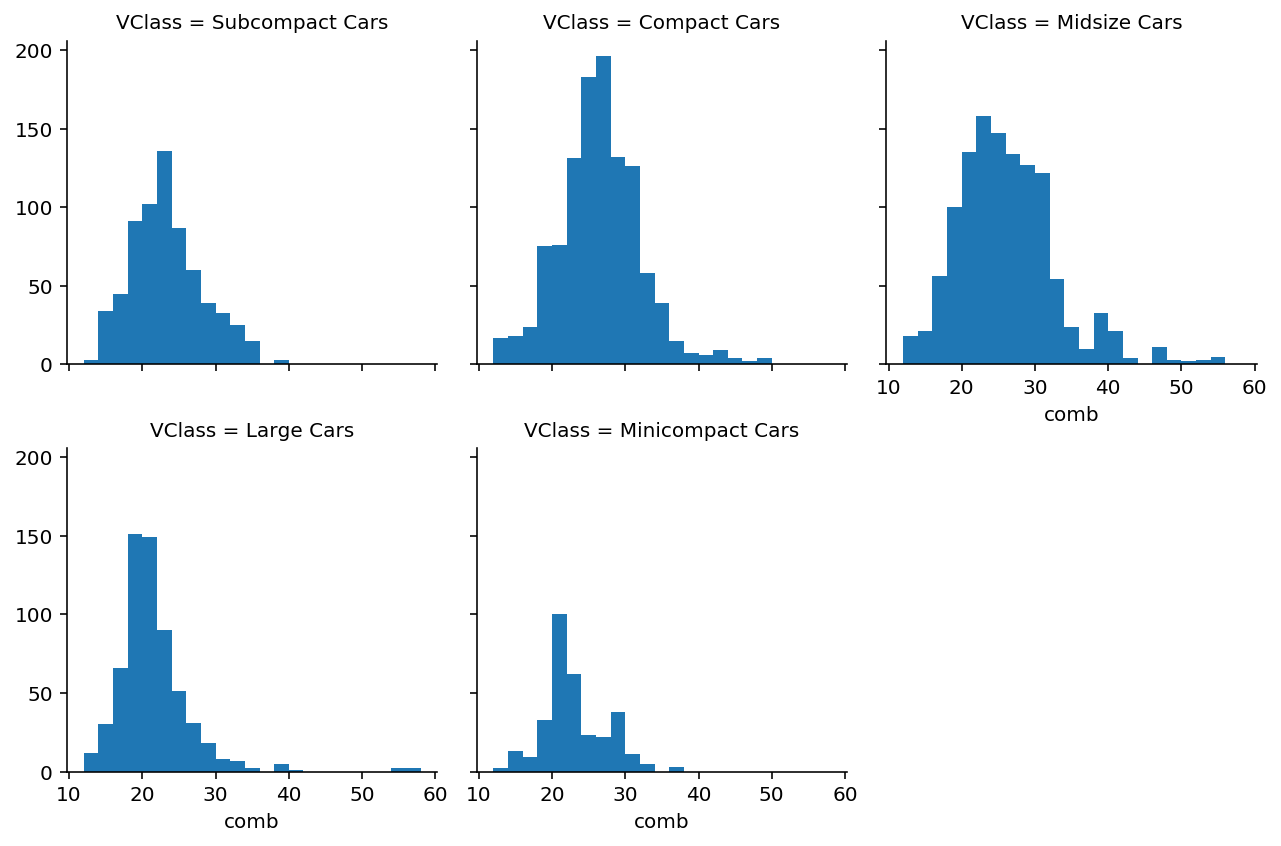

In [13]:
# Set equal bin size for all facets
bins = np.arange(12,58+2,2)

# One facet will be created for each categorical value of 'VClass'
g = sb.FacetGrid(data=fuel_econ, col='VClass', col_wrap=3); # col_wrap similar to word_wrap

# Specify what function to plot in each facet
g.map(plt.hist, 'comb', bins=bins);   # donot put x='comb'

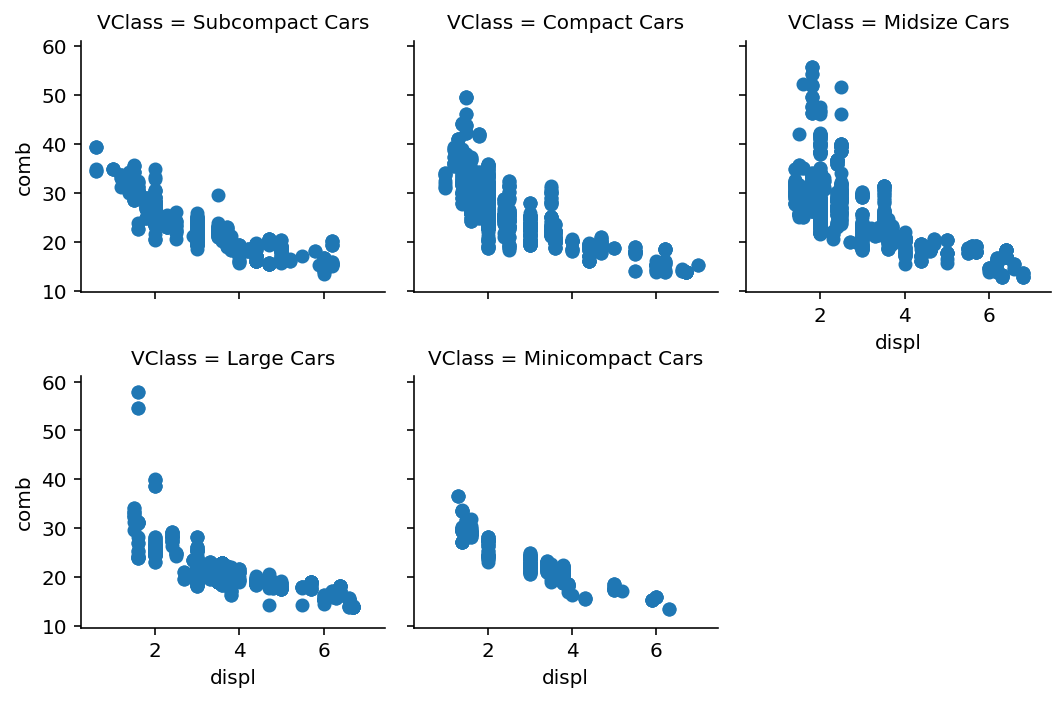

In [5]:
# One facet will be created for each categorical value of 'VClass'
g = sb.FacetGrid(data=fuel_econ, col='VClass', height=2.5, col_wrap=3,
                margin_titles=True); # col_wrap similar to word_wrap

# Specify what function to plot in each facet
g.map(plt.scatter, 'displ', 'comb');   # donot put x='comb'

### Plotting many categorical levels


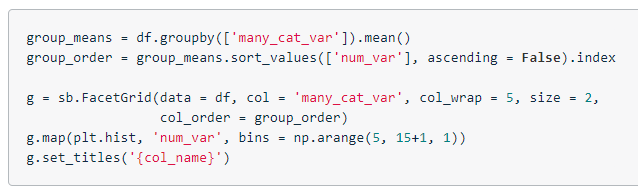

Other operations may be performed to increase the immediate readability of the plots: setting each facet height to 2 inches ("size"), sorting the facets by group mean ("col_order"), limiting the number of bin edges, and changing the titles of each facet to just the categorical level name using the `set_titles` method and `{col_name}` template variable.

## Point plot


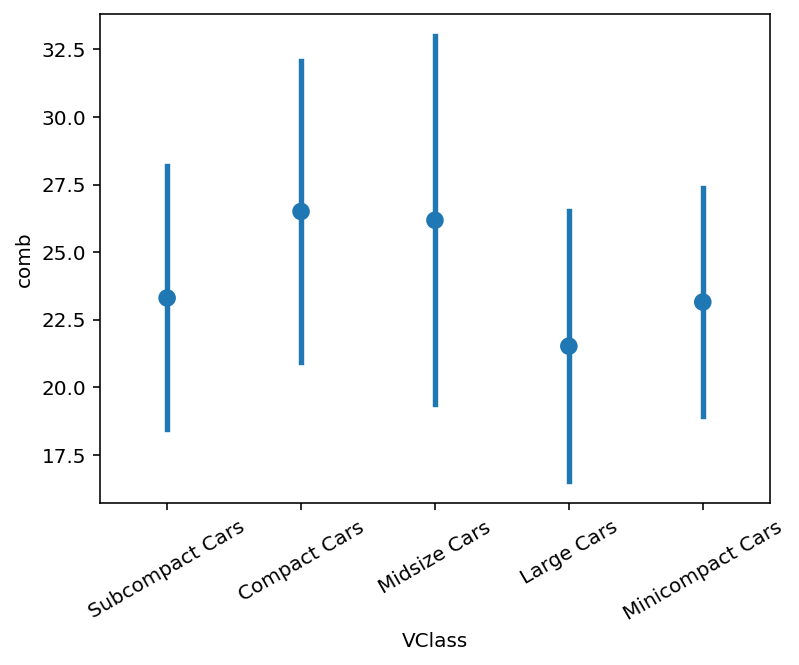

In [26]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', ci='sd', linestyles="");
plt.xticks(rotation=30);

## Bar plot

Plot **'means'** in y axis instead of counts using sb.barplot()

Text(0, 0.5, 'Average combined fuel efficiency')

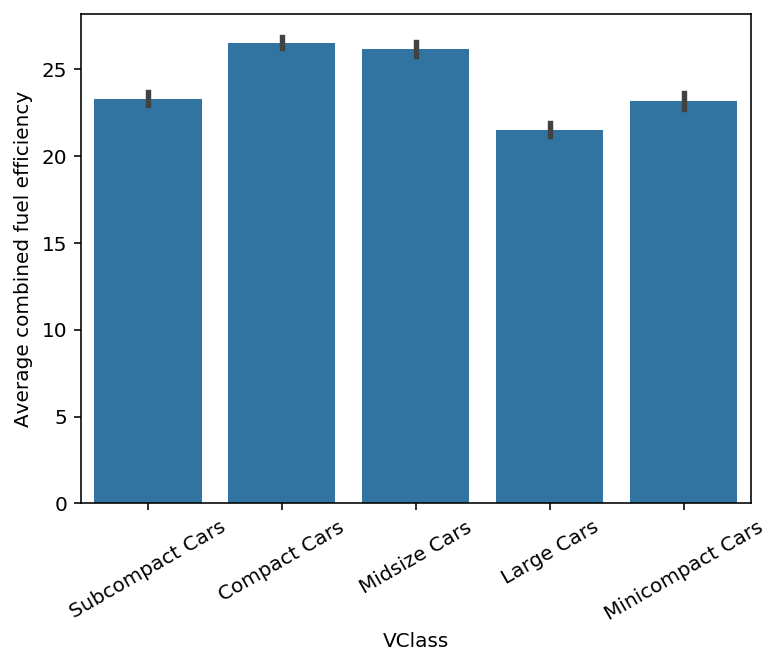

In [24]:
base_color = sb.color_palette()[0];
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color); # errwidth=0 -> to remove whiskers
plt.xticks(rotation=30)
plt.ylabel("Average combined fuel efficiency")

Text(0, 0.5, 'Average combined fuel efficiency')

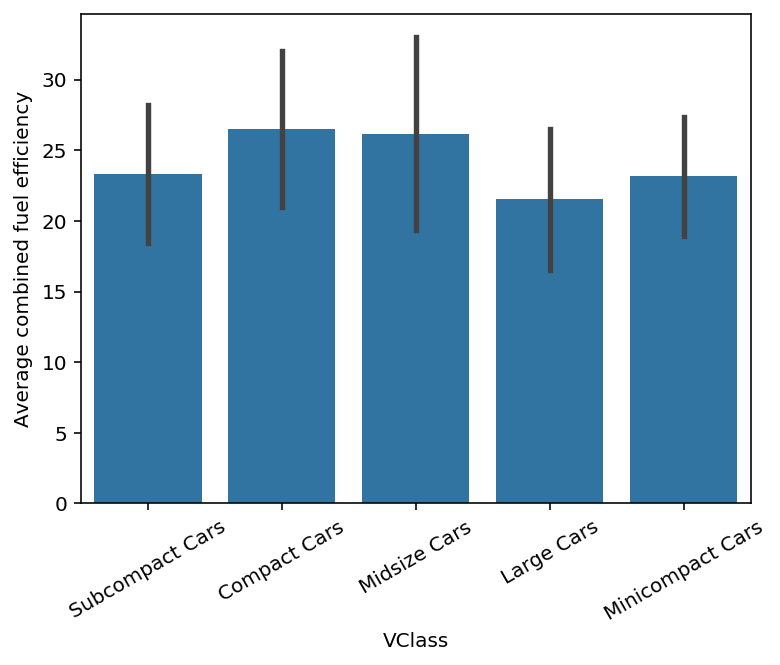

In [25]:
base_color = sb.color_palette()[0];
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd'); 
plt.xticks(rotation=30)
plt.ylabel("Average combined fuel efficiency")

Text(0.5, 0, 'Average Combined Fuel Eff. (mpg)')

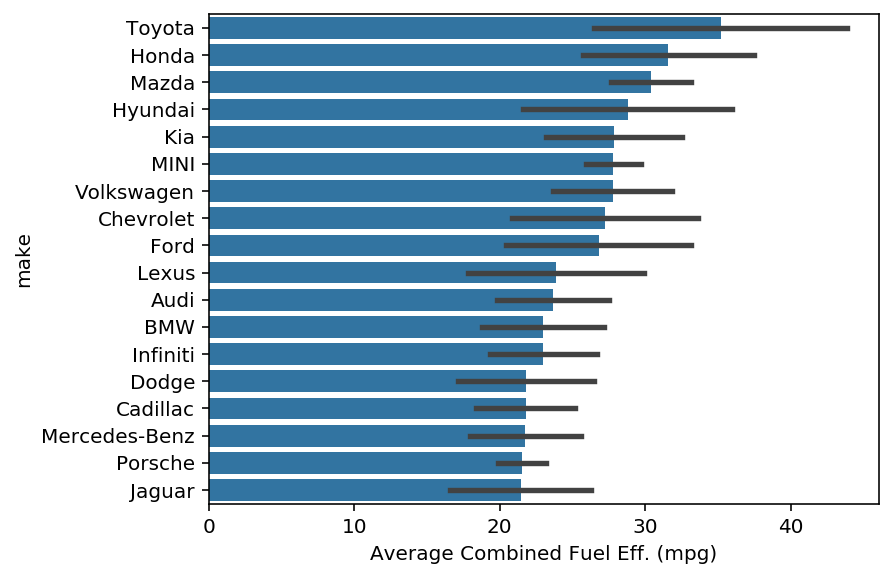

In [30]:
THRESHOLD = 80
make_frequency = fuel_econ['make'].value_counts()
idx = np.sum(make_frequency > THRESHOLD)

most_makes = make_frequency.index[:idx]
fuel_econ_sub = fuel_econ.loc[fuel_econ['make'].isin(most_makes)]

make_means = fuel_econ_sub.groupby('make').mean()
comb_order = make_means.sort_values('comb', ascending = False).index

# plotting
base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ_sub, x = 'comb', y = 'make',
           color = base_color, order = comb_order, ci = 'sd')
plt.xlabel('Average Combined Fuel Eff. (mpg)')